# **Higgs Boson Event Detection**:

$\color{red}{Contents}:$

* Introduction
* Basic Data Exploration
* Univariate Analysis
* Multivariate Analysis
* Acknowledgements
* References

$\color{red}{1.}$ Introduction

* Backstory
* LHC at Work
* Enter ML
* Data
* Project Objective
* Evaluation Metric

$\color{green}{1.1. \quad Backstory} $

Particle accelerators. To probe into the basic questions on how matter, space and time work and how they are structured, physicists focus on the simplest interactions (for example, collision of [subatomic particles](https://en.wikipedia.org/wiki/Subatomic_particle)) at very high energy. [Particle accelerators](https://en.wikipedia.org/wiki/Particle_accelerator) enable physicists to explore the fundamental nature of matter by observing subatomic particles produced by high-energy collisions of particle beams. The experimental measurements from these collisions inevitably lack precision, which is where machine learning (ML) comes into picture. The research community typically relies on standardized machine learning software packages for the analysis of the data obtained from such experiments and spends a huge amount of effort towards improving statistical power by extracting features of significance, derived from the raw measurements.

**`Higgs boson:`** The Higgs boson particle, also called the God particle in mainstream media, is the final ingredient of the standard model of particle physics, which sets the rules for the subatomic particles and forces. The elementary particles are supposed to be massless at very high energies, but some of them can acquire mass at low-energies. The mechanism of this acquiring remained an enigma in theoretical physics for a long time. In  1964
 , `Peter Higgs` and others proposed a mechanism that theoretically explains the origin of mass of elementary particles. The mechanism involves a field, commonly known as `Higgs field`, that the paricles can interact with to gain mass. The more a particle interacts with it, the heavier it is. Some particles, like photon, do not interact with this field at all and remain massless. The Higgs boson particle is the associated particle of the `Higgs field` (all fundamental fields have one). It is essentially the physical manifestation of the Higgs field, which gives mass to other particles. The detection of this elusive particle waited almost half a century since its theorization!

The discovery. On 4th July 2012, the ATLAS and CMS experiments at `CERN's Large Hadron Collider` announced that both of them had observed a new particle in the mass region around 125 GeV. This particle is consistent with the theorized Higgs boson. This experimental confirmation earned François Englert and Peter Higgs The Nobel Prize in Physics 2013

"for the theoretical discovery of a mechanism that contributes to our understanding of the origin of mass of subatomic particles, and which recently was confirmed through the discovery of the predicted fundamental particle, by the ATLAS and CMS experiments at CERN's Large Hadron Collider."

Giving mass to `fermions`. There are many different processes through which the Higgs boson can decay and produce other particles. In physics, the possible transformations a particle can undergo as it decays are referred to as channels. The Higgs boson has been observed first to decay in three distinct decay channels, all of which are boson pairs. To establish that the Higgs field provides the interaction which gives mass to the fundamental fermions (particles which follow the Fermi-Dirac statistics, contrary to the bosons which follow the Bose-Einstein statistics) as well, it has to be demonstrated that the Higgs boson can decay into fermion pairs through direct decay modes. Subsequently, to seek evidence on the `decay of Higgs boson into fermion pairs (such as tau leptons  (τ)
  or b-quarks) ` and to precisely measure their characteristics became one of the important lines of enquiry. Among the available modes, the most promising is the decay to a pair of tau leptons, which balances a modest branching ratio with manageable backgrounds.

`The first evidence of  h→τ+τ−`
  decays was recently reported, based on the full set of proton–proton collision data recorded by the ATLAS experiment at the LHC during  2011
 - 2012
 . Despite the consistency of the data with ` h→τ+τ−`
  decays, it could not be ensured that the statistical power exceeds the ` 5σ
  threshold,` which is the required standard for claims of discovery in high-energy physics community.

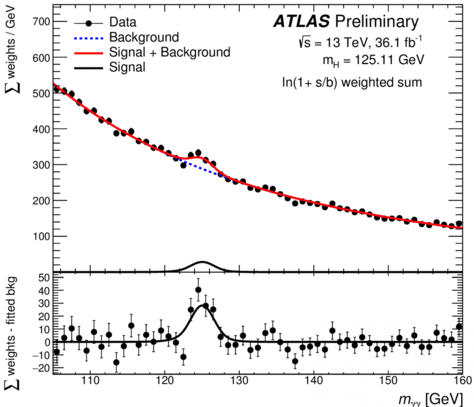

$\color{green} {1.2. \quad LHC \quad at \quad Work} : $

`**Proton-proton collisions**`: In particle physics, an event refers to the results just after a fundamental interaction took place between subatomic particles, occurring in a very short time span, at a well-localized region of space. In the LHC, `swarms of protons` are accelerated on a circular trajectory in both directions, at an extremely high speed. These swarms are made to cross in the ATLAS detector, causing hundreds of millions of proton-proton collisions per second. The resulting events are detected by sensors, producing a sparse vector of about a hundred thousand dimensions (roughly corresponding to an image or speech signal in classical machine learning applications). The `feature construction phase involves extracting type, energy, as well as  3
 -D direction of each particle from the raw data`. Also, the variable-length list of four-tuples is digested into a fixed-length vector of features containing up to tens of real-valued variables.

`**Background events**:` signal events and selection region. Some of these variables are first used in a real-time multi-stage `cascade classifier (called the trigger)` to discard most of the uninteresting events (called background events). The selected events (roughly four hundred per second) are then written on disks by a large CPU farm, producing petabytes of data per year. The saved events still, in large majority, represent known processes (these are also background events). The background events are mostly produced by the decay of particles which, though exotic in nature, are known beforehand from previous generations of experiments. The goal of the offline analysis is to find a region (called selection region) in the feature space that produces significantly excess of events (called signal events) compared to what known background processes can explain. Once the region has been fixed, a statistical test is applied to determine the significance of the excess. `If the probability that the excess has been produced by background processes falls below a certain limit, it indicates the discovery of a new particle.`

**`The classification problem:`**To optimize the selection region, `multivariate classification techniques` are routinely utilized. The formal objective function is unique and somewhat different from the classification error or other objectives that are used regularly in machine learning. Nevertheless, finding a pure signal region corresponds roughly to separating background events and signal events, which is a standard classification problem. Consequently, established classification methods are useful, as they provide better discovery sensitivity than traditional, manual techniques.

**`Weighting and normalization:`** The classifier is trained on simulated background events and signal events. Simulators produce weights for each event to correct for the mismatch between the prior probability of the event and the instrumental probability applied by the simulator. The weights are normalized such that in any region, the sum of the weights of events falling in the region gives an unbiased estimate of the expected number of events found there for a fixed integrated luminosity, which corresponds to a fixed data taking time for a given beam intensity. `In this case, it corresponds to the data collected by the ATLAS experiment in  2012`
 . `Since the probability of a signal event is usually several orders of magnitudes lower than the probability of a background event,` the signal samples and the background samples are usually renormalized to produce a balanced classification problem. A real-valued discriminant function is then trained on this reweighted sample to minimize the weighted classification error. `The signal region is then defined by cutting the discriminant value at a certain threshold,` which is optimized on a held-out set to maximize the sensitivity of the statistical test.

***`The broad goal is to improve the procedure that produces the selection region, i.e. the region (not necessarily connected) in the feature space which produces signal events.`***

$\color{green} {1.3. \quad Enter \quad ML}:$

**`Shallow neural network:`** Machine learning plays a major role in processing data resulting from experiments at particle colliders. The ML classifiers learn to distinguish between different types of collision events by training on simulated data from sophisticated Monte-Carlo programs. `Shallow neural networks with single hidden layer` are one of the primary techniques used for this analysis and standardized implementations are included in the prevalent multivariate analysis software tools used by physicists. Efforts to increase statistical power tend to focus on developing new features for use with the existing machine learning classifiers. These high-level features are non-linear functions of the low-level measurements, derived using knowledge of the underlying physical processes.

**`Deep neural network:`** The abundance of labeled simulation training data and the complex underlying structure make this an ideal application for deep learning, in particular for large, deep neural networks. Deep neural networks can simplify and improve the analysis of high-energy physics data by automatically learning high-level features from the data. In particular, they increase the statistical power of the analysis even without the help of manually derived high-level features.

$\color{green}{1.4. \quad Data}:$

[data link](https://www.kaggle.com/competitions/higgs-boson/data)

**`The simulator:`** The dataset has been built from official ATLAS full-detector simulation. The simulator has two parts. In the first, random proton-proton collisions are simulated based on the knowledge that we have accumulated on particle physics. It reproduces the random microscopic explosions resulting from the proton-proton collisions. In the second part, the resulting particles are tracked through a virtual model of the detector. The process yields simulated events with properties that mimic the statistical properties of the real events with additional information on what has happened during the collision, before particles are measured in the detector.

**`Signal sample and background sample:`** The signal sample contains events in which Higgs bosons (with a fixed mass of  125
  GeV) were produced. The background sample was generated by other known processes that can produce events with at least one electron or muon and a hadronic tau, mimicking the signal. Only three background processes were retained for the dataset. `The first comes from the decay of the  Z
  boson (with a mass of  91.2
  GeV) into two taus.` This decay produces events with a topology very similar to that produced by the decay of a Higgs. `The second set contains events with a pair of top quarks, which can have a lepton and a hadronic tau among their decay.` `The third set involves the decay of the  W
  boson, where one electron or muon and a hadronic tau can appear simultaneously `only through imperfections of the particle identification procedure.

**`Training set and test set:`** The training set and the test set respectively contains  `250000`
  and  `550000`
  observations. The two sets share  `31
  common features` between them. Additionally, the training set contains labels (signal or background) and weights.

# Loading the training data:

In [1]:
# File system manangement
import time, psutil, os

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:

data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/in search of higgs/higgs-boson/training.zip')
data_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [12]:
!pip install ydata-profiling

In [19]:
from ydata_profiling import ProfileReport
profile = pd.DataFrame(data_train)
x=ProfileReport(profile, title="Pandas Profiling Report")
x


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

+ A typical observation from the training set

In [ ]:

data_train.loc[data_train.index[0]]


EventId                          100000
DER_mass_MMC                     138.47
DER_mass_transverse_met_lep      51.655
DER_mass_vis                     97.827
DER_pt_h                          27.98
DER_deltaeta_jet_jet               0.91
DER_mass_jet_jet                124.711
DER_prodeta_jet_jet               2.666
DER_deltar_tau_lep                3.064
DER_pt_tot                       41.928
DER_sum_pt                       197.76
DER_pt_ratio_lep_tau              1.582
DER_met_phi_centrality            1.396
DER_lep_eta_centrality              0.2
PRI_tau_pt                       32.638
PRI_tau_eta                       1.017
PRI_tau_phi                       0.381
PRI_lep_pt                       51.626
PRI_lep_eta                       2.273
PRI_lep_phi                      -2.414
PRI_met                          16.824
PRI_met_phi                      -0.277
PRI_met_sumet                   258.733
PRI_jet_num                           2
PRI_jet_leading_pt               67.435


# Loading the test data

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/in search of higgs/higgs-boson/test.zip')

data_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_MMC                 550000 non-null  float64
 2   DER_mass_transverse_met_lep  550000 non-null  float64
 3   DER_mass_vis                 550000 non-null  float64
 4   DER_pt_h                     550000 non-null  float64
 5   DER_deltaeta_jet_jet         550000 non-null  float64
 6   DER_mass_jet_jet             550000 non-null  float64
 7   DER_prodeta_jet_jet          550000 non-null  float64
 8   DER_deltar_tau_lep           550000 non-null  float64
 9   DER_pt_tot                   550000 non-null  float64
 10  DER_sum_pt                   550000 non-null  float64
 11  DER_pt_ratio_lep_tau         550000 non-null  float64
 12  DER_met_phi_centrality       550000 non-null  float64
 13 

In [ ]:
data_train.loc[data_train.index[0]]

EventId                          100000
DER_mass_MMC                     138.47
DER_mass_transverse_met_lep      51.655
DER_mass_vis                     97.827
DER_pt_h                          27.98
DER_deltaeta_jet_jet               0.91
DER_mass_jet_jet                124.711
DER_prodeta_jet_jet               2.666
DER_deltar_tau_lep                3.064
DER_pt_tot                       41.928
DER_sum_pt                       197.76
DER_pt_ratio_lep_tau              1.582
DER_met_phi_centrality            1.396
DER_lep_eta_centrality              0.2
PRI_tau_pt                       32.638
PRI_tau_eta                       1.017
PRI_tau_phi                       0.381
PRI_lep_pt                       51.626
PRI_lep_eta                       2.273
PRI_lep_phi                      -2.414
PRI_met                          16.824
PRI_met_phi                      -0.277
PRI_met_sumet                   258.733
PRI_jet_num                           2
PRI_jet_leading_pt               67.435


# $\color{yellow}{1.5. Project \quad Objective}:$

***The objective of the project is to classify an event produced in the particle accelerator as background or signal. As described earlier, a background event is explained by the existing theories and previous observations. A signal event, however, indicates a process that cannot be described by previous observations and leads to the potential discovery of a new particle.***

#$\color{green}{1.6. Evaluation Metric:}$

The [evaluation metric](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers), used in this project, is the approximate median significance (AMS), given by

  
AMS:= $\sqrt{2\left(  (s+b+b_{r}) log(1+\frac{s}{b+b_{r}})  -s \right)}$
  

where

+ `s`:unnormalized [true positive rate](https://en.wikipedia.org/wiki/Sensitivity_and_specificity),

+ `b`:unnormalized [false positive rate](https://en.wikipedia.org/wiki/False_positive_rate),
+ `b_r`=10:constant regularization term,
+ `log`:natural logarithm.

# $\color{yellow}{2. Basic \quad Data \quad Exploration:}$

+ Shape of the data

In [ ]:
data_train.shape

(250000, 33)

In [ ]:
data_test.shape

(550000, 31)

In [ ]:
# Columns in the training dataset which are not in the test dataset
[col for col in data_train.columns if col not in data_test.columns]

['Weight', 'Label']

In [ ]:
# Count duplicate rows in the training and test sets
duplicate_rows_count_train = data_train.duplicated().sum()
duplicate_rows_count_test = data_test.duplicated().sum()

# Create a DataFrame to show the counts
df_duplicate_rows = pd.DataFrame({
    'Training set': [duplicate_rows_count_train],
    'Test set': [duplicate_rows_count_test]
}, index=['Number of duplicate rows'])

# Display the DataFrame
df_duplicate_rows


,Training set,Test set
Number of duplicate rows,0,0


In [ ]:
# Count columns with missing values in the training and test sets
missing_columns_count_train = len(data_train.columns[data_train.isna().any()])
missing_columns_count_test = len(data_test.columns[data_test.isna().any()])

# Create a DataFrame to show the counts
df_missing = pd.DataFrame({
    'Training set': [missing_columns_count_train],
    'Test set': [missing_columns_count_test]
}, index=['Number of columns with missing values'])

# Display the DataFrame
df_missing


,Training set,Test set
Number of columns with missing values,0,0


In [ ]:
# Statistical description of numerical variables in the training set
data_train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
# Statistical description of categorical variables in the training set
data_train.describe(include = ['O'])


,Label
count,250000
unique,2
top,b
freq,164333


explaination:



`describe(include=['O']):` The describe method is typically used to provide descriptive statistics of a DataFrame. In this case, include=['O'] specifies that only the categorical (object) columns should be included in the description.

`Statistical Description:` The resulting output will contain various statistics for each of the categorical columns in the training set. These statistics may include:

+ `count:` Number of non-null values in each column.
+ `unique:` Number of distinct values.
+ `top:` Most frequently occurring value.
+ `freq:` Frequency of the most frequently occurring value.

In [ ]:
# Statistical description of numerical variables in the test set
data_test.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,...,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000
mean,624999.500000,-48.950144,49.261093,81.123904,57.824801,-707.448878,-599.705905,-708.391425,2.374076,18.988277,...,-0.008214,209.933695,0.980171,-348.946684,-399.883839,-399.896234,-691.309277,-708.150605,-708.153058,73.248856
std,158771.468365,406.233686,35.425422,40.435560,63.291314,454.928791,659.129589,453.461222,0.779895,21.767376,...,1.812777,126.910079,0.979271,533.155176,489.467786,489.457747,480.435230,453.834190,453.830095,98.467134
min,350000.000000,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.000000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000
25%,487499.750000,78.167750,19.313000,59.422000,14.192000,-999.000000,-999.000000,-999.000000,1.815000,2.838000,...,-1.574000,122.984750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,624999.500000,105.076000,46.455500,73.747000,38.469500,-999.000000,-999.000000,-999.000000,2.492000,12.390000,...,-0.017000,179.949000,1.000000,38.970000,-1.862000,-2.111000,-999.000000,-999.000000,-999.000000,40.503500
75%,762499.250000,130.769000,73.646000,92.173000,79.234250,0.503000,84.266250,-4.538000,2.962000,27.649000,...,1.558000,263.917250,2.000000,75.499000,0.431000,0.484000,33.832000,-2.429000,-2.260000,110.507000
max,899999.000000,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.294000,5.751000,759.363000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


$\color{yellow}{3. Univariate \hspace{0.1 cm} Analysis}: $

+ Target variable
+ Predictor variables

In [ ]:
# Matplotlib patches for adding manual legends
grey_patch = mpatches.Patch(color = 'blue', label = "Train")
red_patch = mpatches.Patch(color = 'red', label = "Test")


`mpatches.Patch(color='grey', label='Train'):` This line creates a patch (a graphical object) with a grey color and a label "Train". A patch in Matplotlib is a shape that can be used to represent a legend entry in a plot.

`mpatches.Patch(color='red', label='Test'):` Similarly, this line creates another patch with a red color and a label "Test".

In general, throughout the notebook, we choose the number of bins of a histogram by the Freedman-Diaconis rule, which suggests the optimal number of bins to grow as $`k∼n^{1/3}`$
  where  n
  is the total number of observations.

$\color{green}{3.1. Target \hspace{0.1cm} variable}:$

The target Label is a binary variable, taking values **b** and **s**, indicating the status of an event.

+ b $\to $ background event
+ s $\to$ signal event

In [ ]:


# Function to create a bar plot and donut plot for a DataFrame column
def bar_donut_plot(dataframe, column, height=500, width=800):
    # Create subplots with one row and two columns
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]])

    # Get the unique values and their counts in the specified column
    x_values, y_values = dataframe[column].value_counts(sort=False).index.tolist(), dataframe[column].value_counts(sort=False).tolist()

    # Add a bar plot to the first subplot
    fig.add_trace(go.Bar(x=x_values, y=y_values, text=y_values, textposition='auto'), row=1, col=1)

    # Add a donut plot to the second subplot
    fig.add_trace(go.Pie(values=y_values, labels=x_values, hole=0.5, textinfo='label+percent', title=f"{column}"), row=1, col=2)

    # Update layout settings for the combined plot with a dark background
    fig.update_layout(
        height=height,
        width=width,
        showlegend=False,
        xaxis=dict(tickmode='linear', tick0=0, dtick=1),
        title=dict(text=f"Frequency distribution of {column}", x=0.5, y=0.95),
        template="plotly_dark"  # Set the dark theme for Plotly
    )

    # Show the combined plot
    fig.show()




In [ ]:
# Target variable
bar_donut_plot(data_train, 'Label')

In [ ]:
# Splitting the training by target class
data_train_b = data_train[data_train['Label'] == 'b'] # Background events in the training set
data_train_s = data_train[data_train['Label'] == 's'] # System events in the training set

$\color{green}{3.2. Predictor \hspace{0.1cm} variables}$

In [ ]:
# Counting unique values for predictor variables in different datasets
unique_values_counts = {
    'Training set (background events)': [data_train_b[col].nunique() for col in data_test.columns],
    'Training set (signal events)': [data_train_s[col].nunique() for col in data_test.columns],
    'Training set (all events)': [data_train[col].nunique() for col in data_test.columns],
    'Test set (all events)': [data_test[col].nunique() for col in data_test.columns]
}

# Create a DataFrame with the counts
df_unique = pd.DataFrame(unique_values_counts, index=data_test.columns)

# Set a caption for better understanding
df_unique.style.set_caption("Number of unique values for the predictor variables")


,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
EventId,164333,85667,250000,550000
DER_mass_MMC,85521,51645,108338,152743
DER_mass_transverse_met_lep,87812,50941,101637,123271
DER_mass_vis,88377,48615,100558,134982
DER_pt_h,84305,64625,115563,165204
DER_deltaeta_jet_jet,5624,6989,7087,7487
DER_mass_jet_jet,38310,31880,68366,140826
DER_prodeta_jet_jet,11605,13627,16593,20258
DER_deltar_tau_lep,4688,3399,4692,4900
DER_pt_tot,50605,36604,59042,76134


In [ ]:
# Calculate the proportion of the value -999 in dataset columns
def proportion_minus_999(df):
    # Identify columns containing -999 and calculate the proportion
    columns_with_minus_999 = [col for col in df.columns if -999 in df[col].value_counts().index]
    proportions = [df[col].value_counts()[-999] / len(df) for col in columns_with_minus_999]
    return pd.Series(index=columns_with_minus_999, data=proportions).sort_values(ascending=False)

# Create a DataFrame to display the proportions
df_minus_999 = pd.DataFrame({
    'Training set (background events)': proportion_minus_999(data_train_b).values,
    'Training set (signal events)': proportion_minus_999(data_train_s).values,
    'Training set (all events)': proportion_minus_999(data_train).values,
    'Test set (all events)': proportion_minus_999(data_test).values
}, index=proportion_minus_999(data_train).index)

# Set a caption for better understanding
df_minus_999.style.set_caption("Proportion of the value -999 in the dataset columns containing -999")


,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
DER_deltaeta_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_mass_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_prodeta_jet_jet,0.756117,0.621033,0.709828,0.708858
DER_lep_eta_centrality,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_pt,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_eta,0.756117,0.621033,0.709828,0.708858
PRI_jet_subleading_phi,0.756117,0.621033,0.709828,0.708858
PRI_jet_leading_pt,0.452867,0.297571,0.399652,0.400284
PRI_jet_leading_eta,0.452867,0.297571,0.399652,0.400284
PRI_jet_leading_phi,0.452867,0.297571,0.399652,0.400284


In [ ]:
# Creating a copy of training and test data with an additional 'dataset' column
data_train_temp = data_train.copy()
data_train_temp['dataset'] = "Train"

data_test_temp = data_test.copy()
data_test_temp['dataset'] = "Test"

# Combining the two datasets vertically
data = pd.concat([data_train_temp, data_test_temp], axis=0, ignore_index=True)


$\color{yellow}{Float \hspace{0.1cm} features:}$

**Comparison of feature distributions for the training set and the test set**¶:

First we check the distributions of the features for the training set and the test set. If we are to train our model on one set (the training set) and use it to make predictions on another (the test set), then it is desirable that the distributions corresponding to the two sets have similar structure.

In [ ]:
# Function to plot distributions of the float features
def hist(df, cols, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = 'dataset', palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

**Explanation:**

`Calculate Number of Rows (nrows):`

+ nrows = math.ceil(len(cols) / ncols): Determine the number of rows needed for the subplot grid based on the number of float columns (cols) and the specified number of columns per row (ncols).

`Create Subplot Grid:`

fig, ax = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4.2 * nrows), sharey=False): Create a subplot grid with the specified number of rows and columns. The size of the figure is adjusted based on the number of columns.

`Plot Histogram for Each Column:`

sns.histplot(data=df, x=cols[i], bins=bins, hue='dataset', palette=['red', 'grey'], ax=ax[i // ncols, i % ncols]): Plot a histogram for the current float column. The hue='dataset' parameter colors the histogram bars based on the 'dataset' column.

`Set X-axis Label:`

ax[i // ncols, i % ncols].set_xlabel(cols[i]): Set the x-axis label for the current subplot to the name of the float column.

`Hide Y-axis Label for Subplots (except the first column):`

if i % ncols != 0: ax[i // ncols, i % ncols].set_ylabel(" "):
 Hide the y-axis label for all subplots except the first column.



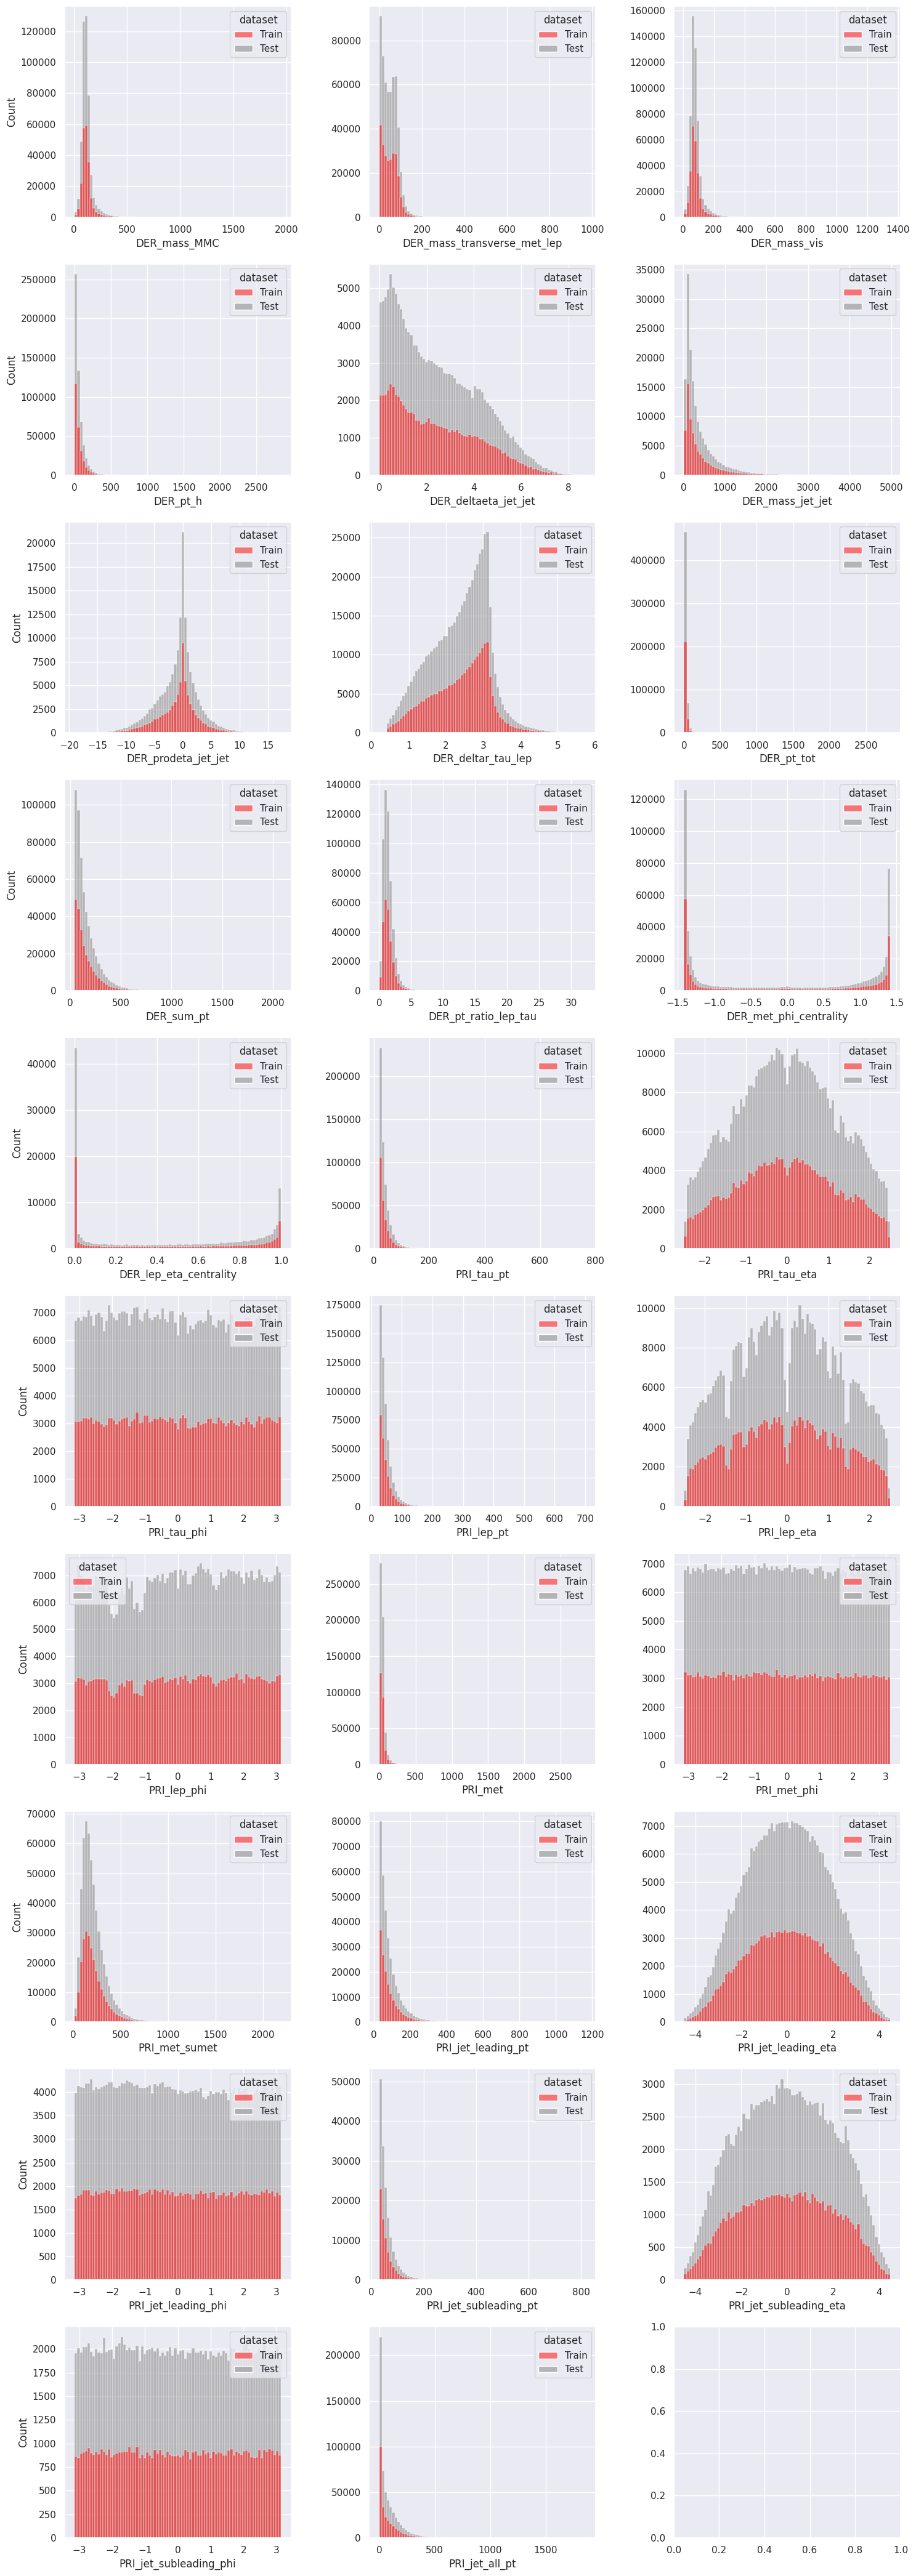

In [ ]:
# Distributions of the float features
hist(data.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     bins = max(math.floor(len(data_train)**(1/3)), math.floor(len(data_test)**(1/3))),
     ncols = 3)

`**Comparison of feature distributions by target class in the training set**`:
Next we compare the univariate distributions of the features for the background events and the signal events in the training set. `If a feature has reasonably different distributions corresponding to the background events and the signal events, then it is a clear indication that the feature is important in the task of classifying the events when the label is unknown.` Similarly, if a feature has very similar distributions for the two target classes, then it is unlikely to help in the classification problem based on the feature alone. This, however, does not take into account the possible dependence the feature may have with other features which may turn out to be useful in the task of classification. A multivariate analysis will be required to check that.

In [ ]:
# Function to plot distributions of the float features in the training set by target class
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['red', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

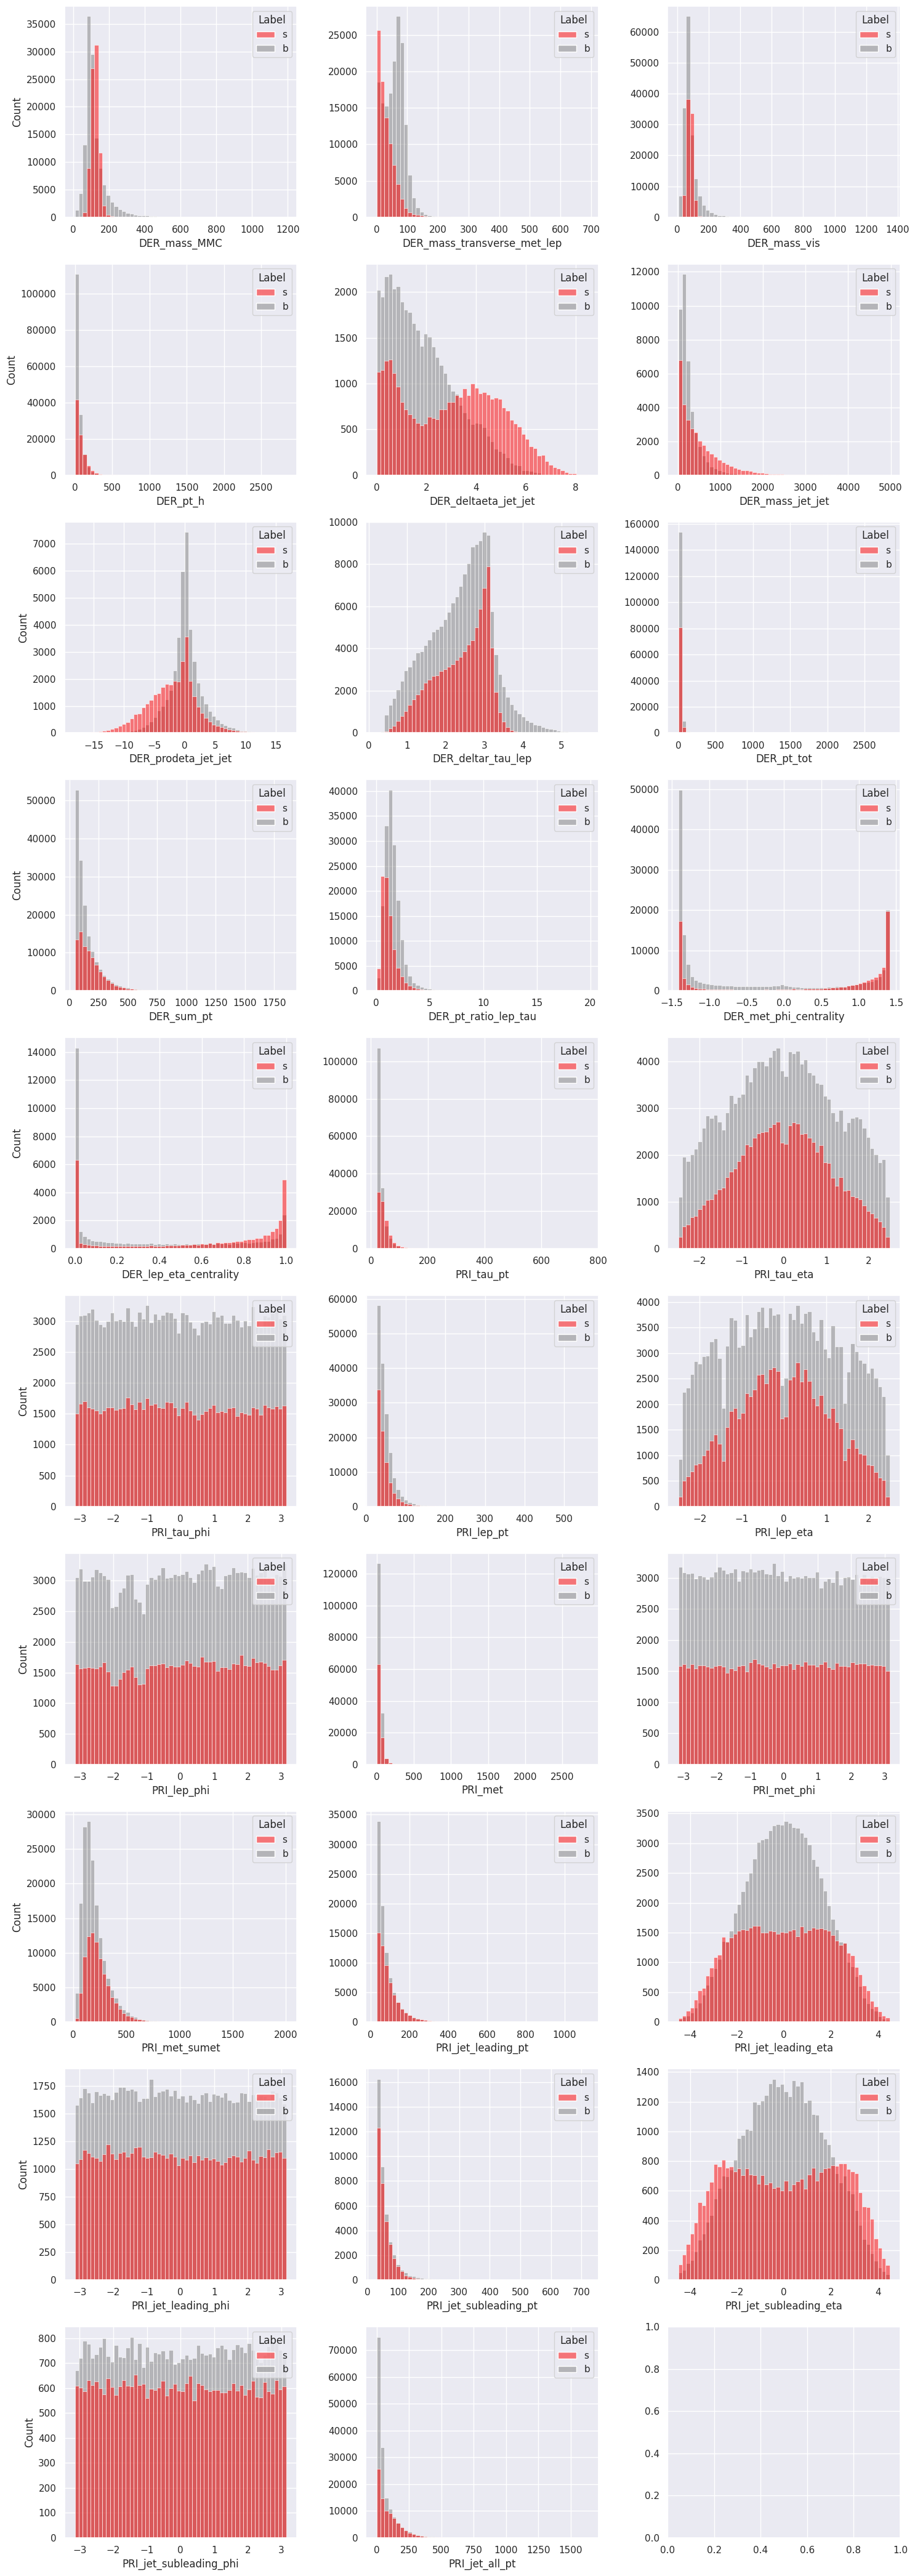

In [ ]:
# Distributions of the float features in the training set by target class
hist_target(data_train.replace(-999, np.nan),
     list(data_test.columns[data_test.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(data_train_b)**(1/3)), math.floor(len(data_train_s)**(1/3))),
     ncols = 3)

$\color{yellow}{Skewness:}$

[Skewness](https://en.wikipedia.org/wiki/Skewness) quantifies the asymmetry of a distribution about its mean. It is given by:

$
g_{1}$= $\frac{\frac{1}{n} \sum^{n}_{i}(x_{i} - \bar{x} )^{3}}   {[\frac{1}{n} \sum^{n}_{i}   (x_{i} - \bar{x})^2
]^{3/2}}
$

where  $\bar{x}$
  is the mean of the observations, given by  

  $\bar{x}$=$\frac{1}{n}\sum^{n}_{i=1}x_i$

 . The measure  $g_1$
  can be negative, zero, positive. A value close to  `0`
  suggests that the distribution is more or less symmetric. However, as it deviates from  0
 , it becomes more and more skewed (either positively or negatively). A positive skewness indicates that the distribution is concentrated towards the left side, with the longer tail being on the right side. A negative skewness indicates that the distribution is concentrated towards the right side, with the longer tail being on the left side.

In [ ]:
# Skewness of the float features
df_skew = pd.DataFrame()

# Extract float columns from the test data
cols_float_test = data_test.columns[data_test.dtypes == 'float64']

# Calculate skewness for different subsets of the training and test data
skew_train_b = data_train_b.replace(-999, np.nan)[cols_float_test].skew().values
skew_train_s = data_train_s.replace(-999, np.nan)[cols_float_test].skew().values
skew_train = data_train.replace(-999, np.nan)[cols_float_test].skew().values
skew_test = data_test.replace(-999, np.nan)[cols_float_test].skew().values

# Populate the DataFrame with skewness values
df_skew['Training set (background events)'] = skew_train_b
df_skew['Training set (signal events)'] = skew_train_s
df_skew['Training set (all events)'] = skew_train
df_skew['Test set (all events)'] = skew_test

# Set float column names as the index
df_skew.set_index(np.array(cols_float_test), inplace=True)

# Add a caption for better understanding
df_skew.style.set_caption("Skewness of the float features")


,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
DER_mass_MMC,3.234194,5.409466,3.807351,3.824925
DER_mass_transverse_met_lep,0.919176,2.687542,1.219211,1.340668
DER_mass_vis,3.344057,4.348492,3.790262,3.602688
DER_pt_h,2.444281,2.419227,2.541885,2.272145
DER_deltaeta_jet_jet,0.788742,0.104843,0.577082,0.579983
DER_mass_jet_jet,2.673334,1.782598,2.457852,2.437294
DER_prodeta_jet_jet,0.215342,-0.137686,-0.328458,-0.335199
DER_deltar_tau_lep,-0.111639,-0.527265,-0.215782,-0.227758
DER_pt_tot,2.642732,22.143181,10.579309,2.848232
DER_sum_pt,2.641115,1.941645,2.320647,2.376312


$\color{yellow}{Observations:}$

`Columns with extreme positive skewness (absolute value greater than  3
  in the training set):`

   DER_mass_MMC, DER_mass_vis, DER_pt_tot, PRI_tau_pt, PRI_lep_pt, PRI_met, PRI_jet_subleading_pt


`Columns with high positive skewness (absolute value between  1
  and  3
  in the training set): `

  DER_mass_transverse_met_lep, DER_pt_h, DER_mass_jet_jet, DER_sum_pt, DER_pt_ratio_lep_tau, PRI_met_sumet, PRI_jet_leading_pt, PRI_jet_all_pt

`Columns with moderate positive skewness (absolute value between  0.5
  and  1
  in the training set):`


   DER_deltaeta_jet_jet

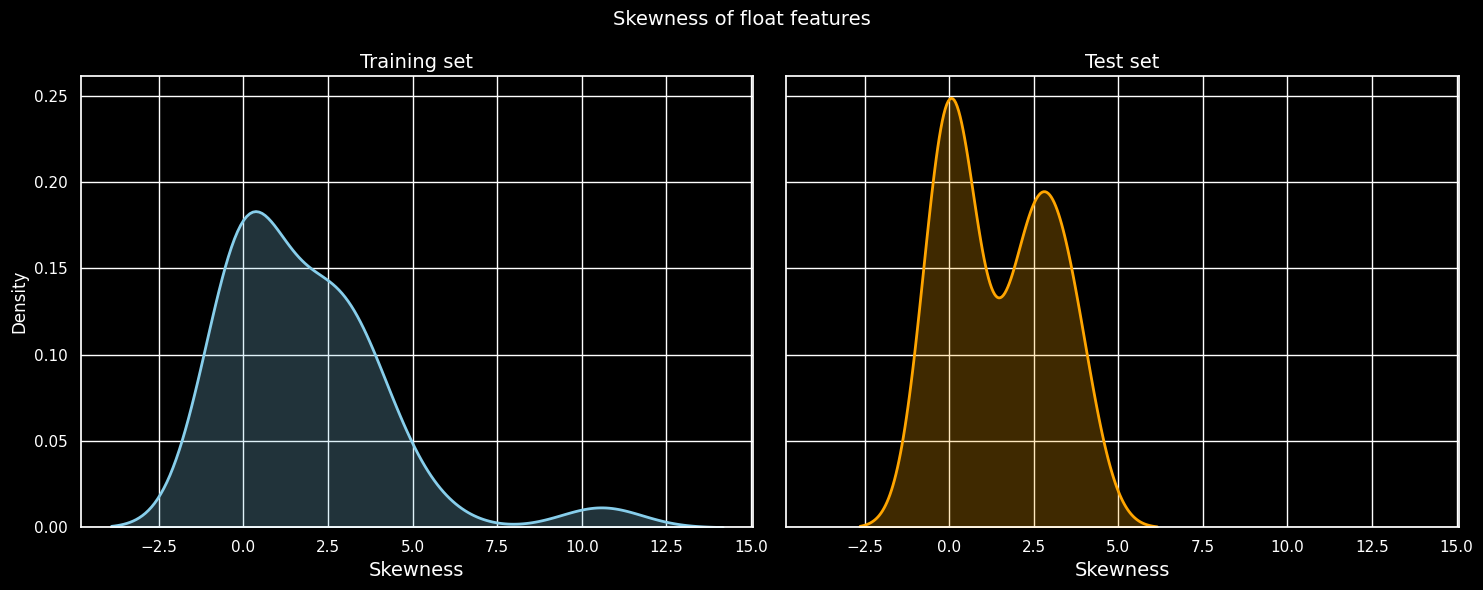

In [ ]:
# Set dark background style
plt.style.use('dark_background')

# Distribution of skewness of the float features in the training set and the test set
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Plot KDE for the training set skewness
sns.kdeplot(data=df_skew, x='Training set (all events)', ax=ax[0], fill=True, color='skyblue', linewidth=2)

# Plot KDE for the test set skewness
sns.kdeplot(data=df_skew, x='Test set (all events)', ax=ax[1], fill=True, color='orange', linewidth=2)

# Set titles and labels
ax[0].set_title("Training set", fontsize=14)
ax[0].set_xlabel("Skewness", fontsize=14)
ax[1].set_title("Test set", fontsize=14)
ax[1].set_xlabel("Skewness", fontsize=14)

# Set overall title
plt.suptitle("Skewness of float features", fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


$\color{yellow}{Observations:}$

+ The skewness distribution for both the training set and the test set have global peak near  0

+ There is a mild peak far towards the right (around  11
 ) in the skewness distribution for the training set, indicating that some of the float features in the training set exhibit extremely high positive skewness
+The skewness distribution for the test set has a clear bimodal structure, with a local peak near  2.5

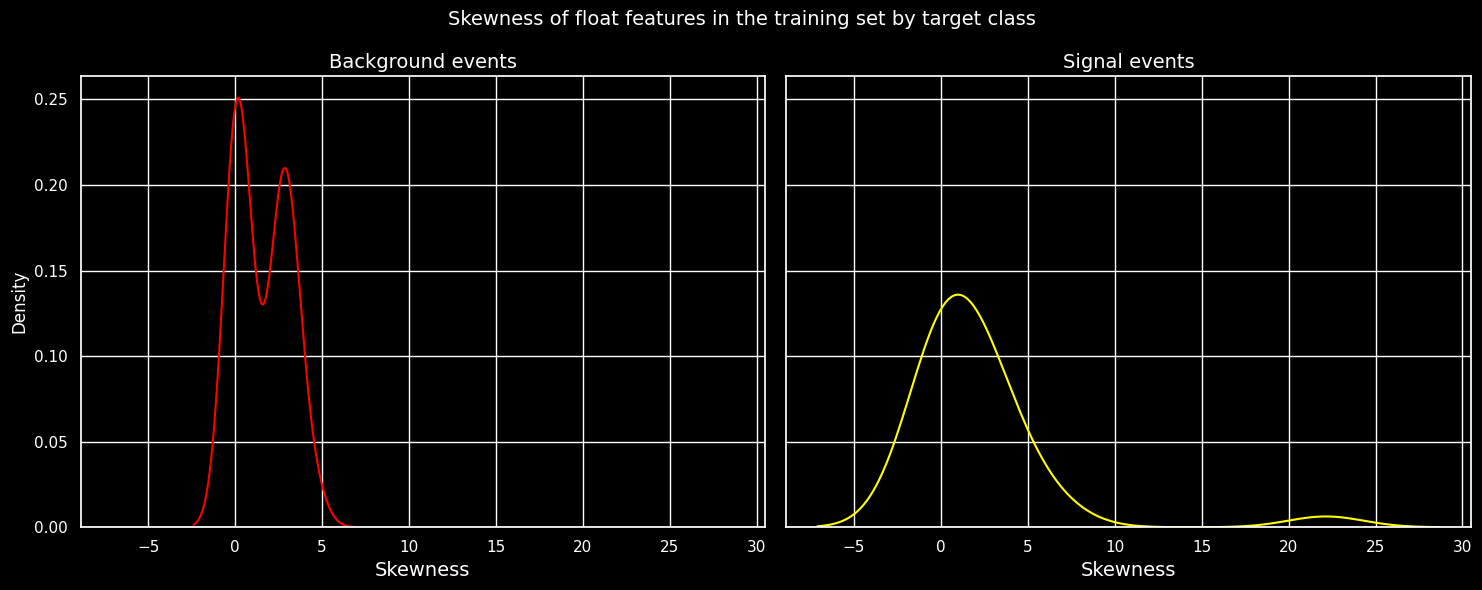

In [ ]:
# Distribution of skewness of the float features in the training set by target class
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_skew, x = 'Training set (background events)', ax = ax[0],color='red')
sns.kdeplot(data = df_skew, x = 'Training set (signal events)', ax = ax[1],color='yellow')
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Skewness", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Skewness", fontsize = 14)
plt.suptitle("Skewness of float features in the training set by target class", fontsize = 14)
plt.tight_layout()
plt.show()

$\color{yellow}{Observations:}$

+The skewness distribution for both the background events and the signal events in the training set have global peak near  0

+There is a mild peak far towards the right (around  22
 ) in the skewness distribution for the signal events, indicating presence of float features with extreme positive skewness for the signal events.

+The skewness distribution for the background events has a clear bimodal structure, with a local peak near  2.5

# [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis):

Kurtosis generally quantifies the peakedness and tailedness of a distribution. It is given by

$b_2$= $ \frac{\frac{1}{n} \sum^{n}_{i=1}(x_{i}-\bar{x}  )^{4}  }  {[\frac{1}{n} \sum^{n}_{i=1}  (x_{i}- \bar{x}  )^2  ]^2}$

where  $\bar{x}$ is the mean of the observations, given by

$\bar{x}=\frac{1}{n} \sum^{n}_{i=1} x_{i} $

A relocated version of the kurtosis, taking into account the fact that  $b_2=3$ for the normal distribution
is defined as the [Excess kurtosis ](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis), given by  $g_2:=b_2−3$
 . The measure  $g_2$
  can be negative, zero, positive. A value close to  0
  suggests that the distribution has similar kurtosis as that of the normal distribution.
  A positive excess kurtosis `(leptokurtic distribution)` indicates that the distribution has more concentration towards the center or the tails, giving it a rather slender shape (lepto- literally means slender). On the other hand a negative excess kurtosis `(Platykurtic distribution)` indicates that the distribution has more concentration in the regions between the center and the tails, giving it a broad shape (platy- literally means broad).

  `Note:` The ability of the measure  $b_2$ or  $g_2$
  to quantify peakedness of a distribution has been a topic of debate. See [this paper](https://www.jstor.org/stable/24591697?seq=1) for more details.


In [ ]:
# Kurtosis of the float features
df_kurt = pd.DataFrame()
kurt_train_b = data_train_b.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_train_s = data_train_s.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_train = data_train.replace(-999, np.nan)[cols_float_test].kurt().values
kurt_test = data_test.replace(-999, np.nan)[cols_float_test].kurt().values
df_kurt['Training set (background events)'], df_kurt['Training set (signal events)'] = kurt_train_b, kurt_train_s
df_kurt['Training set (all events)'], df_kurt['Test set (all events)'] = kurt_train, kurt_test
df_kurt.set_index(np.array(cols_float_test), inplace = True)
df_kurt.style.set_caption("Kurtosis of the float features")

,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
DER_mass_MMC,18.169587,98.759510,27.750916,29.705950
DER_mass_transverse_met_lep,6.340793,17.392724,6.366788,9.288809
DER_mass_vis,26.043411,79.845197,35.493510,29.276542
DER_pt_h,9.642894,27.264743,22.027717,8.349816
DER_deltaeta_jet_jet,0.029833,-1.048605,-0.577399,-0.574925
DER_mass_jet_jet,12.126412,4.201860,8.444995,8.090794
DER_prodeta_jet_jet,2.528480,0.583312,1.484246,1.516095
DER_deltar_tau_lep,-0.208961,-0.608437,-0.222446,-0.237601
DER_pt_tot,15.313731,2386.930876,1036.490806,18.968087
DER_sum_pt,11.344782,6.243744,8.837216,9.819158


$\color{yellow}{Observations:}$

`Columns with extreme leptokurtosis (excess kurtosis greater than  3
  in the training set): `
  
  DER_mass_MMC, DER_mass_transverse_met_lep, DER_mass_vis, DER_pt_h, DER_mass_jet_jet, DER_pt_tot, DER_sum_pt, DER_pt_ratio_lep_tau, PRI_tau_pt, PRI_lep_pt, PRI_met, PRI_met_sumet, PRI_jet_leading_pt, PRI_jet_subleading_pt, PRI_jet_all_pt.

`Columns with high leptokurtosis (excess kurtosis between  1
  and  3
  in the training set): `

  DER_prodeta_jet_jet.

`Columns with high platykurtosis (excess kurtosis between  −3 and  −1
  in the training set):`

  DER_met_phi_centrality, DER_lep_eta_centrality, PRI_tau_phi, PRI_lep_phi, PRI_met_phi, PRI_jet_leading_phi, PRI_jet_subleading_phi.

`Columns with moderate platykurtosis (excess kurtosis between  −1
  and  −0.5
  in the training set):`

   DER_deltaeta_jet_jet, PRI_tau_eta, PRI_lep_eta, PRI_jet_leading_eta, PRI_jet_subleading_eta.

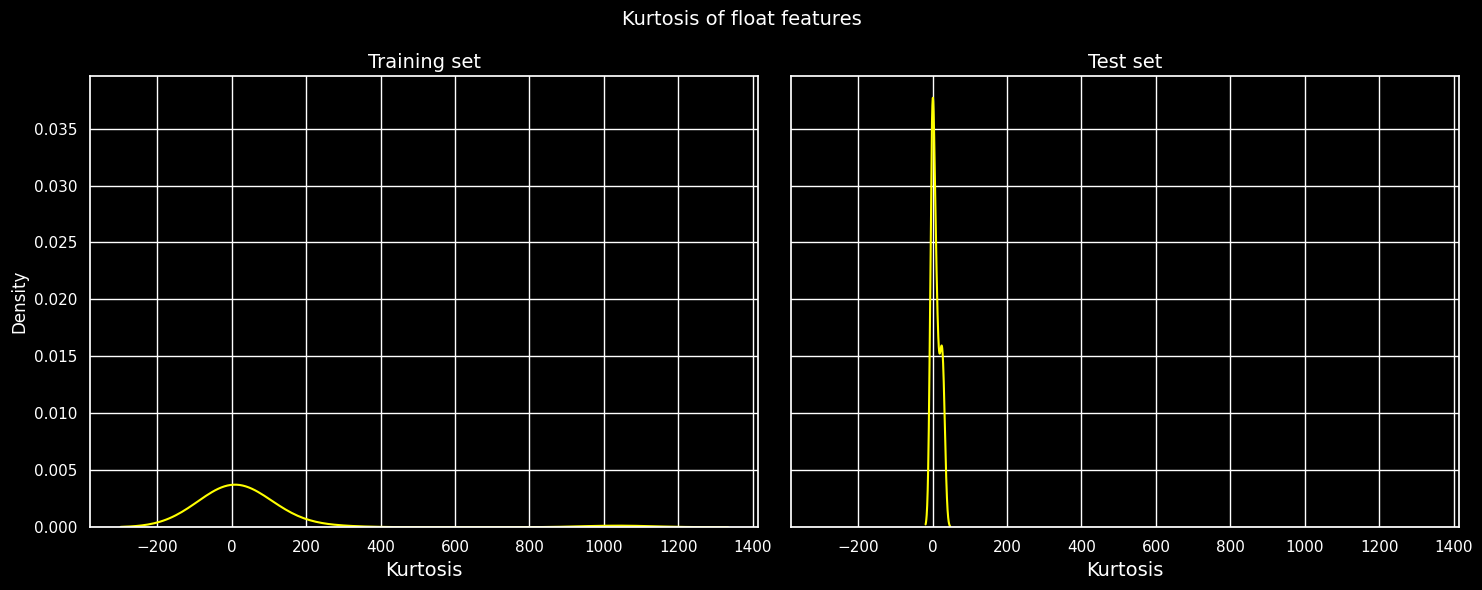

In [ ]:
# Distribution of kurtosis of the float features
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_kurt, x = 'Training set (all events)', ax = ax[0],color='yellow')
sns.kdeplot(data = df_kurt, x = 'Test set (all events)', ax = ax[1],color='yellow')
ax[0].set_title("Training set", fontsize = 14)
ax[0].set_xlabel("Kurtosis", fontsize = 14)
ax[1].set_title("Test set", fontsize = 14)
ax[1].set_xlabel("Kurtosis", fontsize = 14)
plt.suptitle("Kurtosis of float features", fontsize = 14)
plt.tight_layout()
plt.show()

$\color{yellow}{Observations:}$

+ The kurtosis distribution for both the training set and the test set have global peak near  0
 .
+ The kurtosis distribution for the training set is more or less bell-shaped and relatively dispersed, whereas the same for the test set is far more concentrated about  0
  with high peakedne

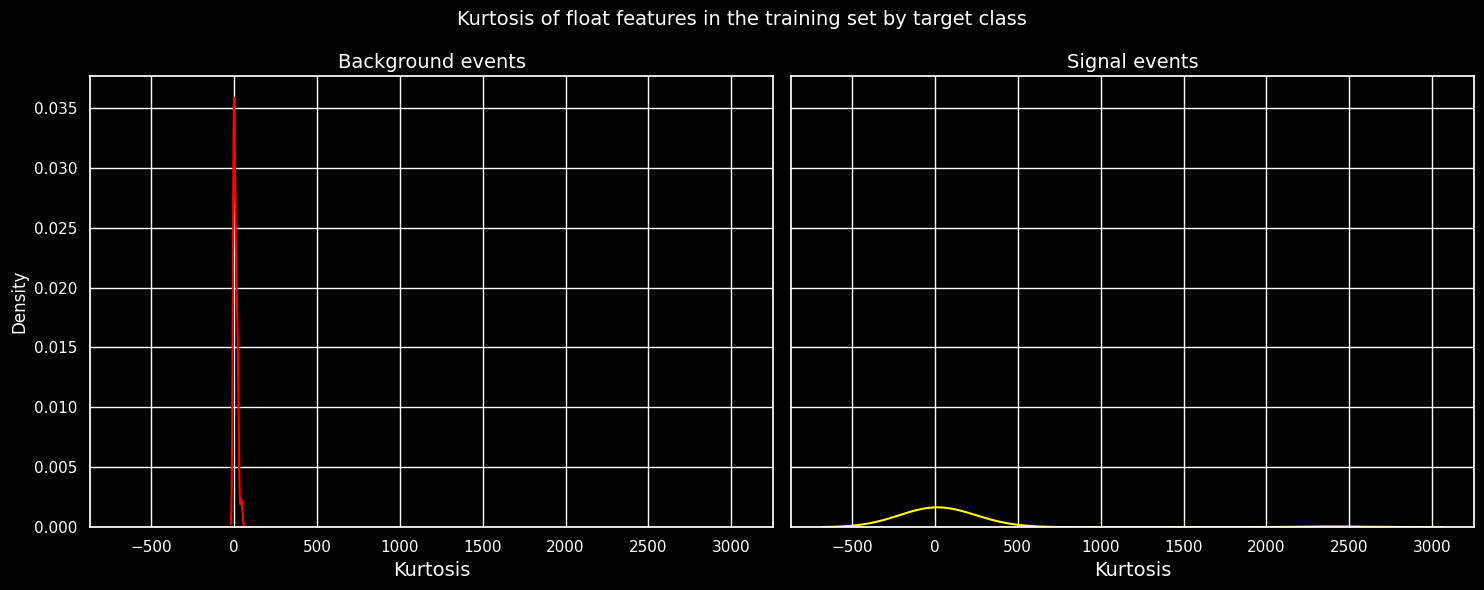

In [ ]:
# Distribution of kurtosis of the float features in the training set by target class
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_kurt, x = 'Training set (background events)', ax = ax[0],color='red')
sns.kdeplot(data = df_kurt, x = 'Training set (signal events)', ax = ax[1],color='yellow')
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Kurtosis", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Kurtosis", fontsize = 14)
plt.suptitle("Kurtosis of float features in the training set by target class", fontsize = 14)
plt.tight_layout()
plt.show()

$\color{yellow}{Observations:}$

+ The kurtosis distribution for both the background events and the signal events in the training set have global peak near  0.

+ The kurtosis distribution for the signal events is more or less bell-shaped and relatively dispersed, whereas the same for the background events is far more concentrated about  0 with high peakedness.

` For both skewness and kurtosis, we see uncanny resemblance between the respective distribution plots for background events in the training set and all events in the test set. This indicates that majority of the observations in the test set may be background events.`

$\color{yellow}{Integer \hspace{0.1cm} feature:}$

In [ ]:
# Donutplots
def donut(df1, df2, col, text1, text2, title_text="Title"):
    fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], row_heights=[0.5], specs=[[{"type": "pie"}, {"type": "pie"}]])

    fig.add_trace(go.Pie(labels=df1[col].value_counts().index, values=df1[col].value_counts(), legendgroup="group", textinfo='percent', hole=0.3, title=dict(text=text1)), row=1, col=1)
    fig.add_trace(go.Pie(labels=df2[col].value_counts().index, values=df2[col].value_counts(), legendgroup="group", textinfo='percent', hole=0.3, title=dict(text=text2)), row=1, col=2)

    fig.update_layout(
        title=dict(text=title_text, y=0.9, x=0.5, xanchor='center', yanchor='top'),
        plot_bgcolor='rgb(0,0,0)',  # Set the background color of the plot
        paper_bgcolor='rgb(0,0,0)'  # Set the background color of the entire figure
    )

    fig.show()


In [ ]:
# Frequency comparison of PRI_jet_num for the training set and the test set
donut(data_train, data_test, col = 'PRI_jet_num', text1 = 'Train', text2 = 'Test', title_text = "Frequency comparison of PRI_jet_num")

$\color{yellow}{Observation:}$
 The proportions of values of PRI_jet_num are more or less same for both the training set and the test set.

In [ ]:
# Frequency comparison of PRI_jet_num for the background events and the signal events in the training set
donut(data_train_b, data_train_s, col = 'PRI_jet_num', text1 = 'Background', text2 = 'Signal', title_text = "Frequency comparison of PRI_jet_num in the training set by target class")

$\color{yellow}{Observation:}$
The proportions of values of PRI_jet_num, especially  0 and  2
 , differ for the background events and the signal events in the training set.

# $\color{yellow}{4. Multivariate Analysis}:$

+ $\color{green}{4.1. Correlation \hspace{0.1cm} structure \hspace{0.1cm} of \hspace{0.1cm} float \hspace{0.1cm} features:}$

[Correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a statistical measure of linear dependence between two variables. Extreme correlation gives an indication that the two variables are linearly related, however this does not prove any causal relationship between the said variables. The measure is defined as the covariance of the two variables, scaled by the product of respective standard deviations. Let  ${(x_1,y_1),(x_2,y_2),⋯,(x_n,y_n)}$
  be paired data on the variables  (x,y)
 . Then the correlation coefficient of the two variables is given by:

$r_{xy}$ = $\frac{\text{cov}(x,y)}{s_{x} s_{y}}$

= $\frac{\frac{1}{n} \sum^{n}_{i=1} (x_{i} -\bar{x} )  (y_{i} -\bar{y} ) }{\sqrt{\frac{1}{n} \sum^{n}_{i=1} (x_{i} -\bar{x} )^2} \sqrt{\frac{1}{n} \sum^{n}_{i=1} (y_{i} -\bar{y} )^2}}$


where  $\bar{x}$
  and  $\bar{y}$
  denote the respective sample means of the two variables.
 .

In [ ]:
# Correlation coefficients of pairs of float features
df_corr = pd.DataFrame(columns = ['feature_1', 'feature_2', 'Training set (background events)', 'Training set (signal events)', 'Training set (all events)', 'Test set (all events)'])
cols = cols_float_test
for i in range(len(cols)):
    for j in range(len(cols)):
        if i<j:
            df_corr.loc[len(df_corr.index)] = [cols[i], cols[j], data_train_b[cols[i]].corr(data_train_b[cols[j]]), data_train_s[cols[i]].corr(data_train_s[cols[j]]), data_train[cols[i]].corr(data_train[cols[j]]), data_test[cols[i]].corr(data_test[cols[j]])]
df_corr.sort_values(by = 'Training set (all events)', ascending = False, inplace = True)
df_corr # df_corr.style.set_caption("Correlation coefficient of pairs of float features")

,feature_1,feature_2,Training set (background events),Training set (signal events),Training set (all events),Test set (all events)
113,DER_deltaeta_jet_jet,DER_lep_eta_centrality,0.999999,0.999998,0.999998,0.999998
284,DER_lep_eta_centrality,PRI_jet_subleading_phi,0.999998,0.999997,0.999998,0.999998
283,DER_lep_eta_centrality,PRI_jet_subleading_eta,0.999998,0.999996,0.999997,0.999997
128,DER_deltaeta_jet_jet,PRI_jet_subleading_phi,0.999997,0.999994,0.999996,0.999996
127,DER_deltaeta_jet_jet,PRI_jet_subleading_eta,0.999997,0.999993,0.999995,0.999995
...,...,...,...,...,...,...
176,DER_deltar_tau_lep,DER_sum_pt,-0.299393,-0.752640,-0.432603,-0.432563
195,DER_deltar_tau_lep,PRI_jet_all_pt,-0.335259,-0.729584,-0.448737,-0.447731
0,DER_mass_MMC,DER_mass_transverse_met_lep,-0.411116,-0.481948,-0.455755,-0.455255
237,DER_pt_ratio_lep_tau,PRI_tau_pt,-0.426471,-0.499522,-0.474633,-0.474313


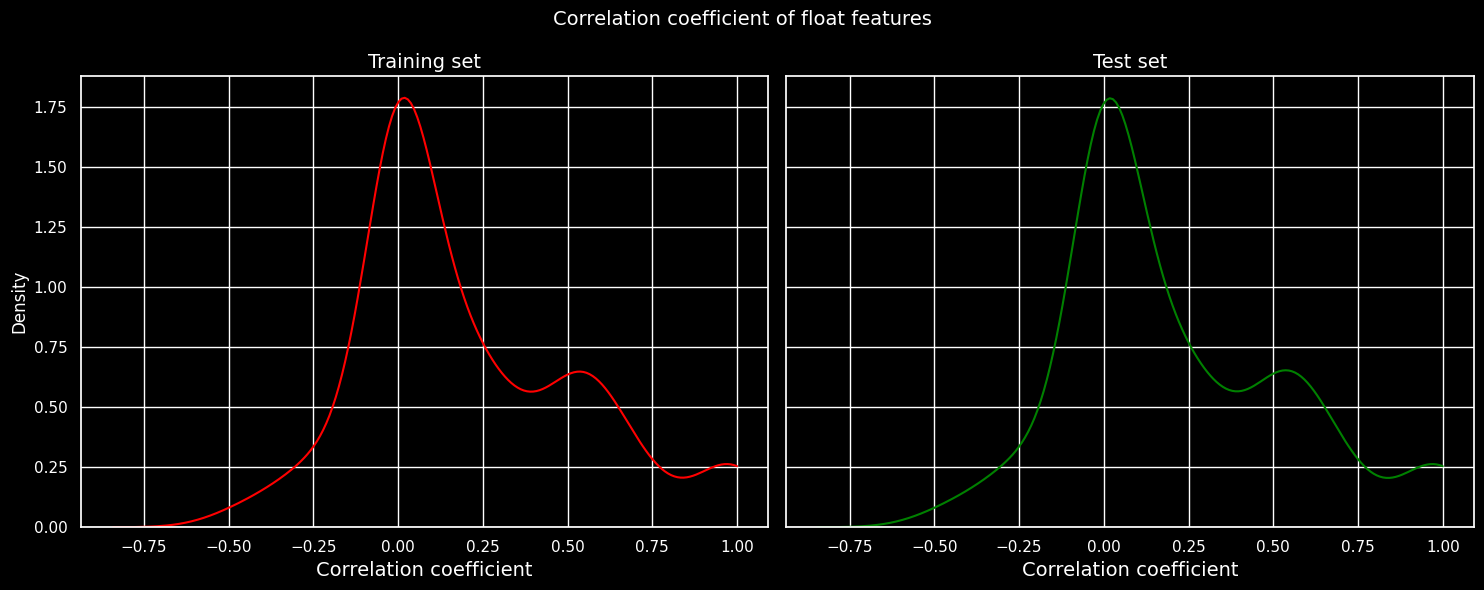

In [ ]:
# Distribution of correlation coefficient of pairs of float features
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_corr, x = 'Training set (all events)', clip = (-1.0, 1.0), ax = ax[0],color='red')
sns.kdeplot(data = df_corr, x = 'Test set (all events)', clip = (-1.0, 1.0), ax = ax[1],color='green')
ax[0].set_title("Training set", fontsize = 14)
ax[0].set_xlabel("Correlation coefficient", fontsize = 14)
ax[1].set_title("Test set", fontsize = 14)
ax[1].set_xlabel("Correlation coefficient", fontsize = 14)
plt.suptitle("Correlation coefficient of float features", fontsize = 14)
plt.tight_layout()
plt.show()

Observations:

+ The correlation distribution is almost identical for the training set and the test set.

+ The density has its global peak near  0
 , however there is a local peak between  0.5
  and  0.6
 , indicating a fair number of moderately to highly correlated pairs of features.
+ There is even an increase in the density after  0.8
 , with a small peak very close to  1
 , indicating the presence of a few extremely correlated pairs of features

<Axes: >

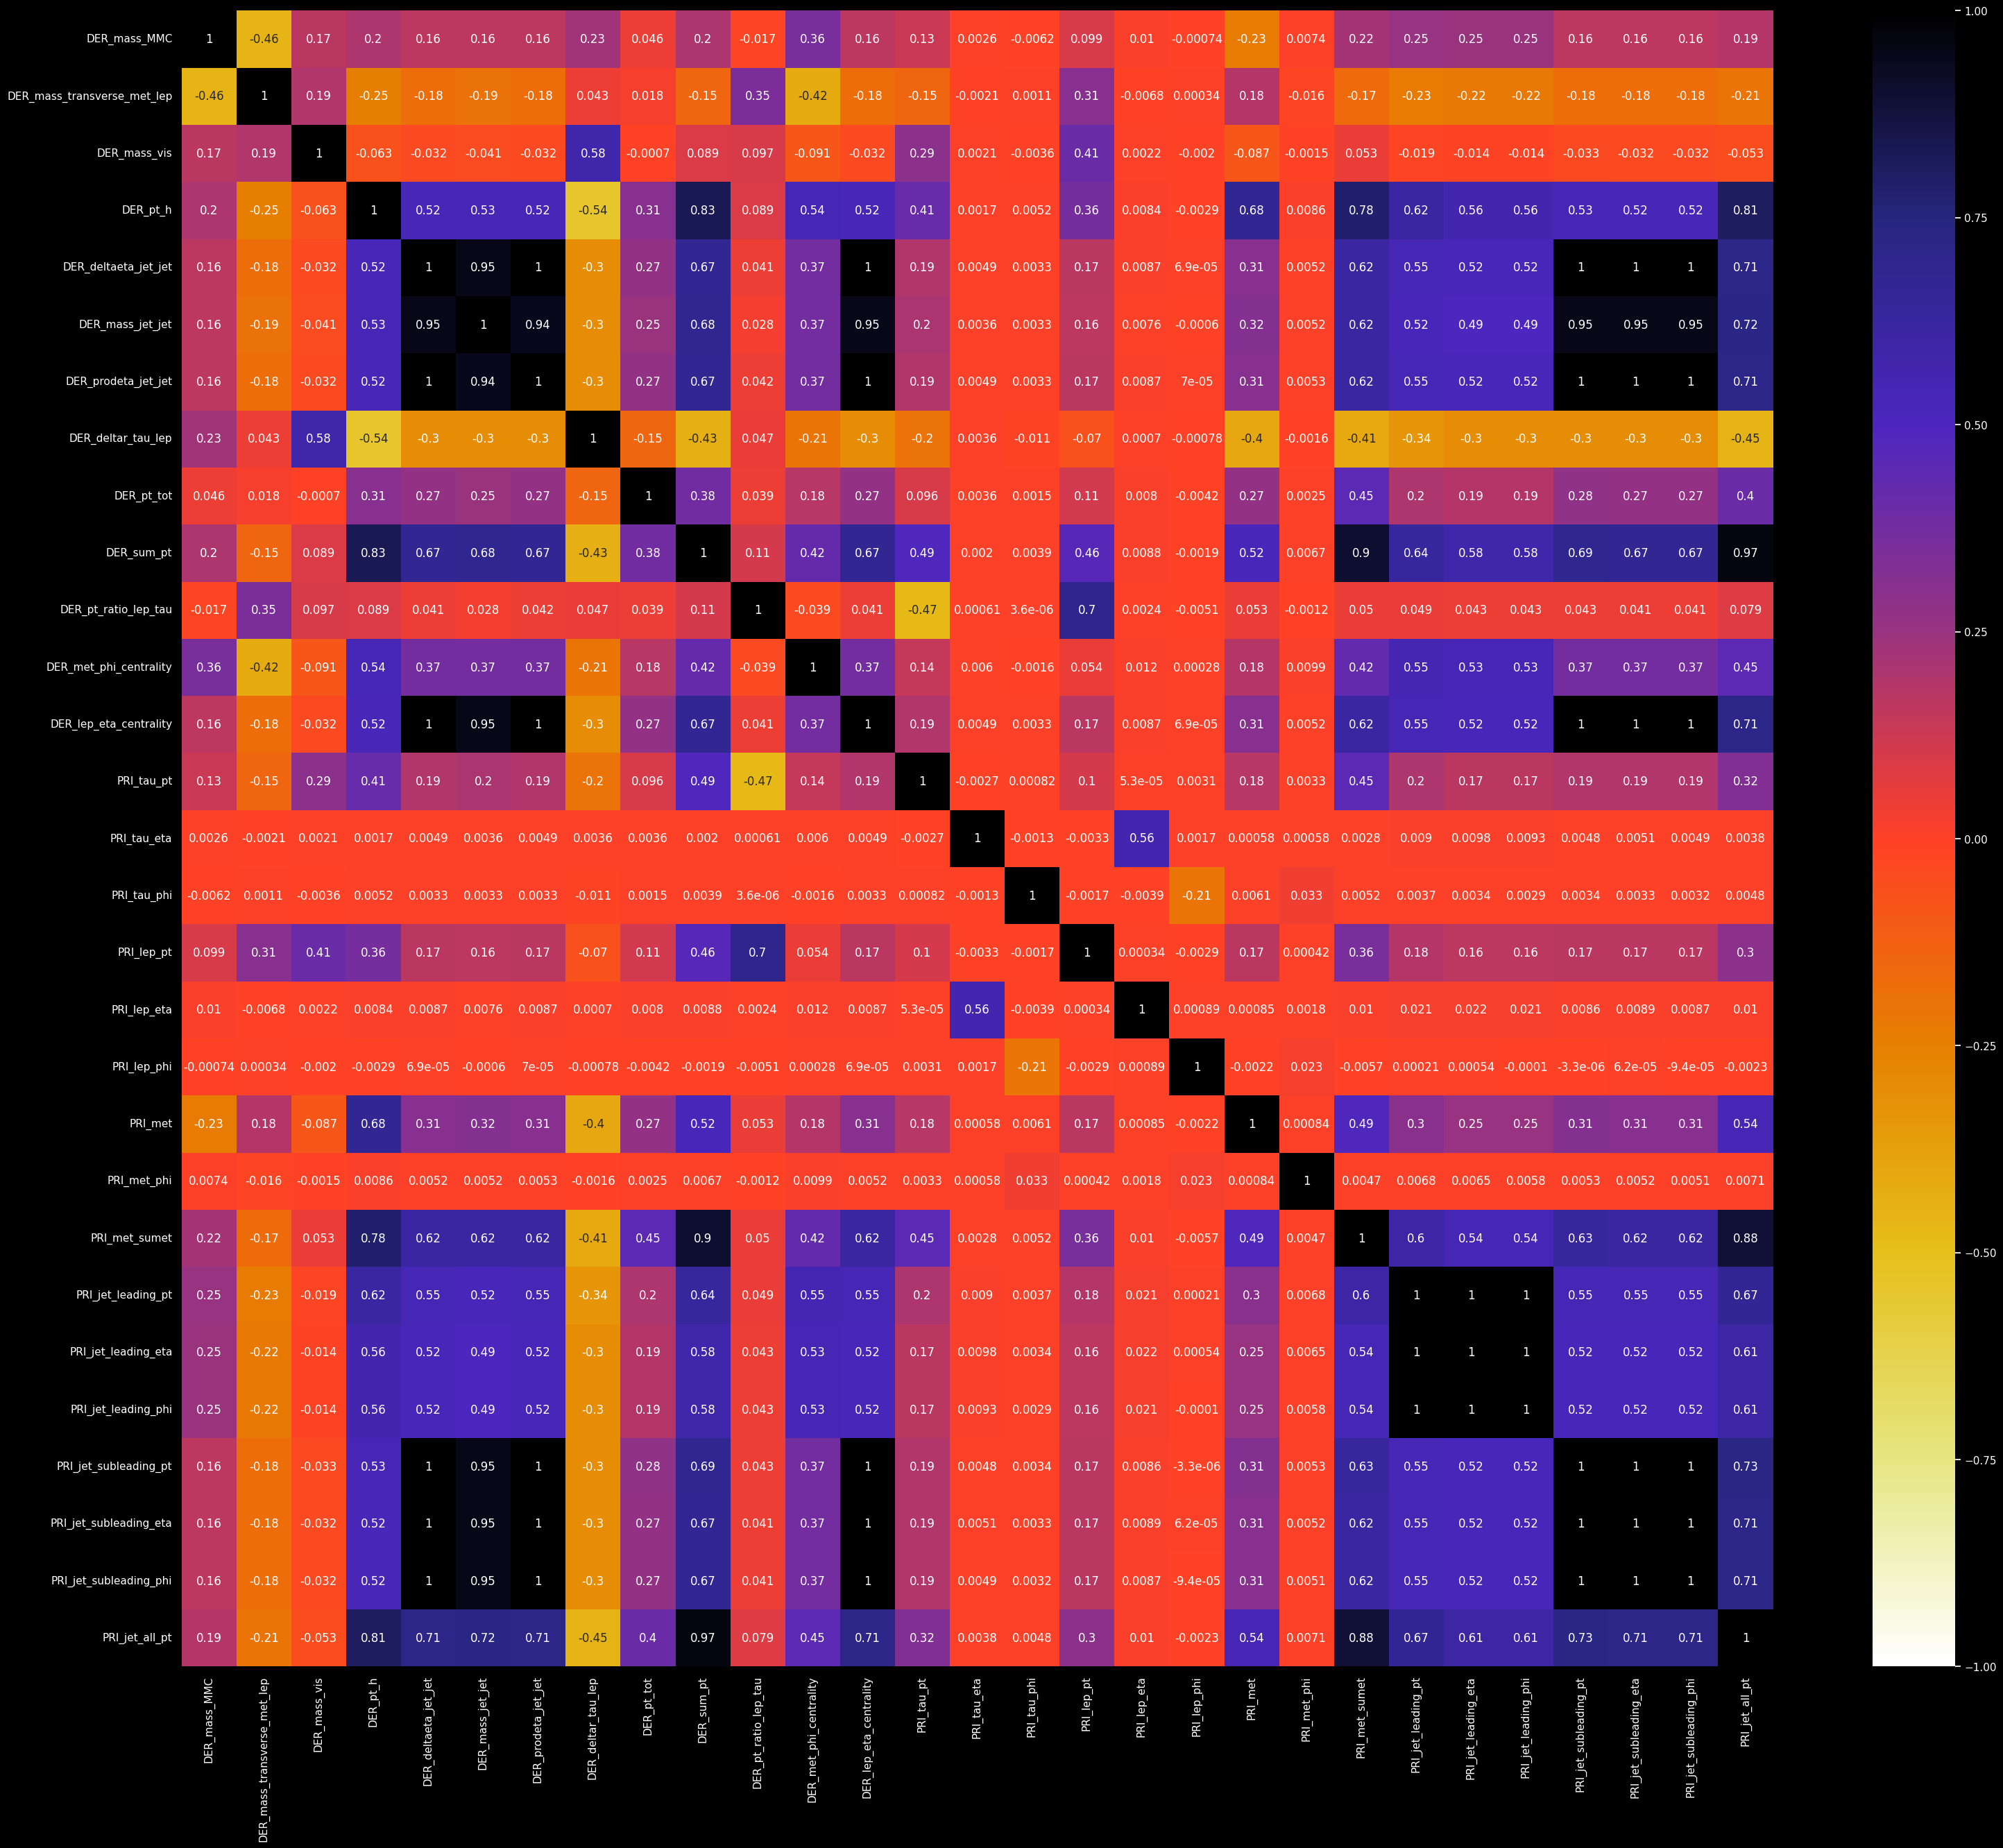

In [ ]:
# Correlation heatmap of float features for the training set
plt.figure(figsize = (37, 31))
sns.heatmap(data_train[cols_float_test].corr(), vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)

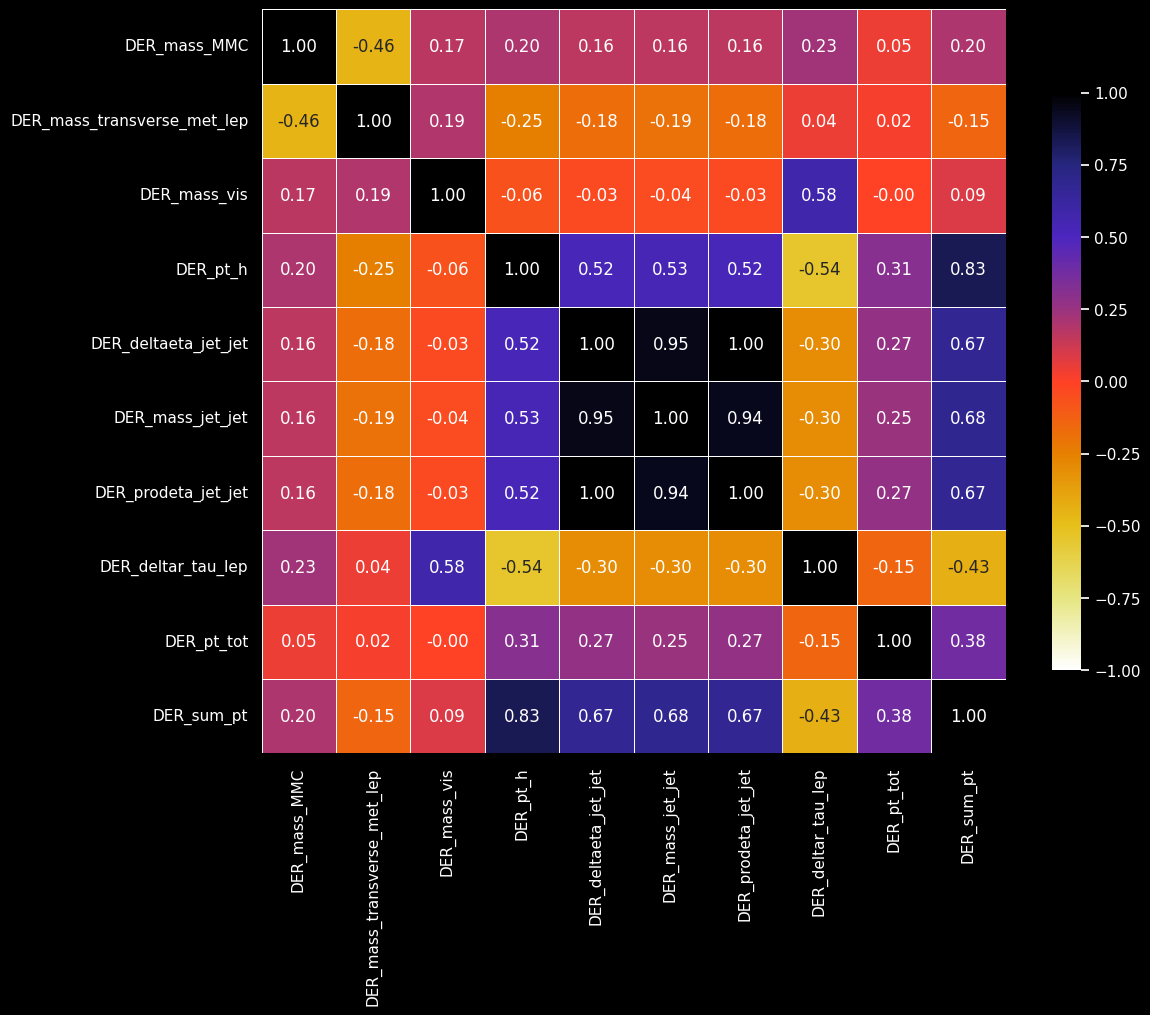

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of features or adjust as needed
selected_cols = cols_float_test[:10]

# Calculate the correlation matrix
corr_matrix = data_train[selected_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a clustered heatmap with annotations and a color map
sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=plt.cm.CMRmap_r,
    linewidths=.5,
    fmt=".2f",  # Format for annotations (two decimal places)
    square=True,  # Make the plot square
    cbar_kws={"shrink": 0.75},  # Shrink the color bar
    xticklabels=selected_cols,  # Show feature names on x-axis
    yticklabels=selected_cols,  # Show feature names on y-axis
)

# Display the plot
plt.show()


Observation:
###  The following groups have shown extremely high positive correlation structure within themselves, i.e. any two features from a single group has extremely high correlation coefficient.

+ DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi
+ DER_sum_pt, PRI_met_sumet, PRI_jet_all_pt
+ PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi

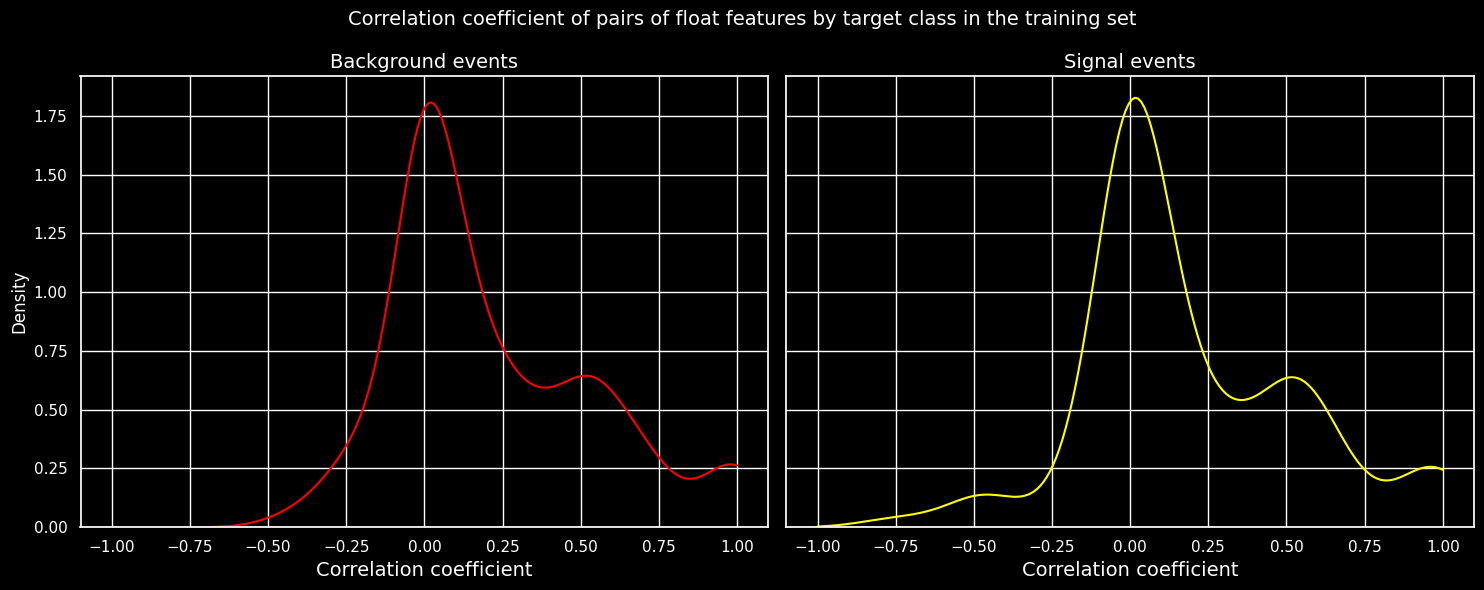

In [ ]:
# Distribution of correlation coefficient of pairs of float features by target class in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_corr, x = 'Training set (background events)', clip = (-1.0, 1.0), ax = ax[0],color='red')
sns.kdeplot(data = df_corr, x = 'Training set (signal events)', clip = (-1.0, 1.0), ax = ax[1],color='yellow')
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Correlation coefficient", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Correlation coefficient", fontsize = 14)
plt.suptitle("Correlation coefficient of pairs of float features by target class in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

\$color{yellow}{Observations:}$

+ The left tail of the correlation distributions corresponding to background events and signal events in the training set are different.

+ The densities have their respective global peaks near  0
 , however there is a local peak between  0.5
  and  0.6
  for both of them, indicating a fair number of pairs of float features with moderate to high positive correlation.

  + The left tail of the correlation distribution for the signal events is heavier compared to the same for the background events, indicating that there are more pairs of float features with moderate to high negative correlation for the signal events than the background events in the training set.

  + For both target classes, there is an increase in the density after  0.8
 , with a small peak very close to  1
 , indicating the presence of a few pairs of float features with extreme positive correlation



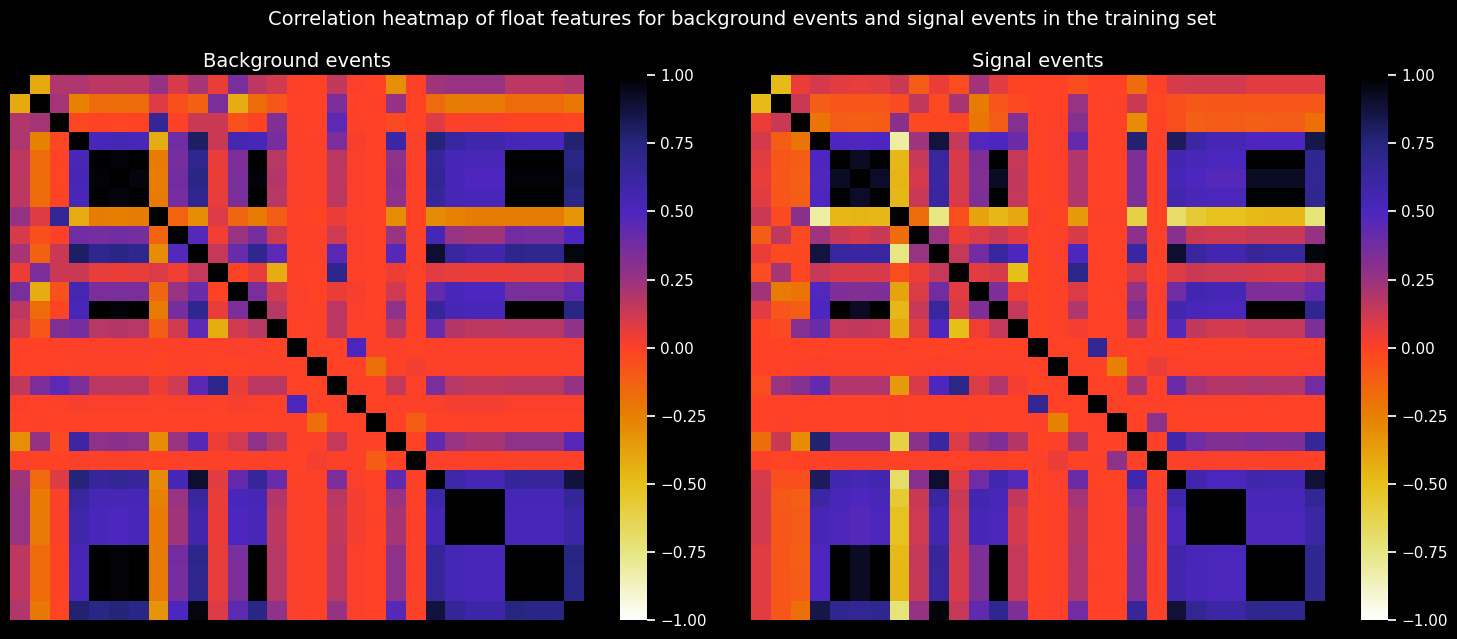

In [ ]:
# Correlation heatmap of float features for background events and signal events in the training set
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5), sharex = True, sharey = True)
sns.heatmap(data_train_b[cols_float_test].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[0])
sns.heatmap(data_train_s[cols_float_test].corr(), vmin = -1, vmax = 1, annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of float features for background events and signal events in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

$\color{yellow}{Observation:}$ The two heatmaps are more or less similar, i.e. the overall correlation structure of the float features corresponding to the background events and the signal events in the training set are very much alike.

`In the next two subsections, we present bivariate (trivariate) scatterplots for some selected pairs (triples) of features. These plots are given separately for the background events and signal events appearing in the training set. So they can be used not only to understand the relationship between (among) a pair (triple) of features, but also the ability of the pair (triple) to classify an event as background (b) or signal (s).`

$\color{green}{4.2. Bivariate \hspace{0.1cm}scatterplots}$

In [ ]:
# Selected bivariate scatterplots
pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]

for z in pairs_selected:
    fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
    sns.scatterplot(data = data_train_b.replace(-999, np.nan), x = z[0], y = z[1], ax = ax[0],color='red',size=0.5)
    sns.scatterplot(data = data_train_s.replace(-999, np.nan), x = z[0], y = z[1], ax = ax[1],color='yellow',size=0.5)
    ax[0].set_title("Background events", fontsize = 14)
    ax[1].set_title("Signal events", fontsize = 14)
    plt.tight_layout()

plt.show()

Output hidden; open in https://colab.research.google.com to view.

$\color{yellow}{Acknowledgements}$

+ [Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014](http://opendata.cern.ch/record/328)

+ [Higgs Boson Machine Learning Challenge dataset](https://www.kaggle.com/competitions/higgs-boson/data)

+ [The Higgs boson machine learning challenge documentation](https://higgsml.ijclab.in2p3.fr/documentation/)